In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from similarity_searching_sketches.caffe_vector_reader import CaffeVectorsIterator
from similarity_searching_sketches.distances import get_sample_distances
from similarity_searching_sketches.persistence import save_np_array
from similarity_searching_sketches.visualization import hist_array

#### Experiment configuration

In [2]:
DATA_FOLDER='/home/matej/data/sketch-testing/dataset_100K/'
CAFFE_VECTORS_PATH='/home/matej/data/sketch-testing/profi-neuralnet-100K.data' #caffe vectors file 
TRAIN_SET_SAVE_PATH=DATA_FOLDER+'train_set.npy' #persist train dataset to
TEST_SET_SAVE_PATH=DATA_FOLDER+'test_set.npy' #persist test dataset to
DATA_SAMPLE_SIZE=100000 #number of samples to read
PORTION_TEST_SET=0.2 #portion of samples in test set
N_DIST_DISTR_REF_OBJ=100 #how many reference objects to use for distance distribution estimation
LOG_BY=10000

#### Read raw data



In [3]:
iterator=CaffeVectorsIterator(CAFFE_VECTORS_PATH, DATA_SAMPLE_SIZE,allow_duplicities=False)

In [4]:
_, decaf_vecs=zip(*list(iterator))
decaf_vecs=np.array(decaf_vecs)

#### Shape of vectors (n_samples, n_features)

In [5]:
decaf_vecs.shape

(86648, 4096)

#### Shuffle vectors

In [6]:
np.random.shuffle(decaf_vecs)

#### Train/test split

In [7]:
training_set, test_set=train_test_split(decaf_vecs,test_size=PORTION_TEST_SET)

In [8]:
training_set.shape

(69318, 4096)

In [9]:
test_set.shape

(17330, 4096)

#### Persist 

In [10]:
save_np_array(TRAIN_SET_SAVE_PATH, training_set)
save_np_array(TEST_SET_SAVE_PATH, test_set)

#### Analysis of distance distribution

In [11]:
distances_l1, distances_l2 = get_sample_distances(vec_matrix=training_set, sample_size=N_DIST_DISTR_REF_OBJ, p=[1,2], log_by=LOG_BY)


INFO:Going to compute distances from selected 100 reference objects to all 69218 other objects in given matrix for p=[1, 2].
INFO:IterationLogger| Started iteration no.: 10000
 Time from previous iteration: 49.32181739807129s
 Time from start: 49.3218195438385s
INFO:IterationLogger| Started iteration no.: 20000
 Time from previous iteration: 51.05329632759094s
 Time from start: 100.37511706352234s
INFO:IterationLogger| Started iteration no.: 30000
 Time from previous iteration: 48.560882806777954s
 Time from start: 148.9360010623932s
INFO:IterationLogger| Started iteration no.: 40000
 Time from previous iteration: 49.66653347015381s
 Time from start: 198.60253524780273s
INFO:IterationLogger| Started iteration no.: 50000
 Time from previous iteration: 49.32988142967224s
 Time from start: 247.9324176311493s
INFO:IterationLogger| Started iteration no.: 60000
 Time from previous iteration: 49.49758720397949s
 Time from start: 297.4300057888031s


#### Distance distribution Minkowski L1

In [12]:
pd.DataFrame(distances_l1).describe()

,0
count,6.921800e+06
mean,2.637263e+03
std,3.185975e+02
min,2.626105e+02
25%,2.438023e+03
50%,2.637000e+03
75%,2.836796e+03
max,5.078885e+03


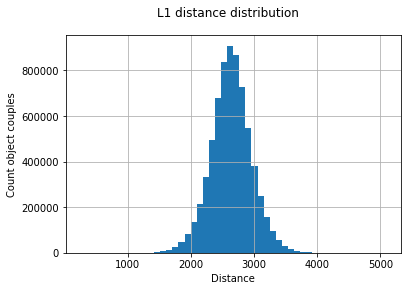

In [13]:
hist_array(distances_l1, bins=50, title='L1 distance distribution', xlabel='Distance', ylabel='Count object couples')

#### Distance distribution Minkowski L2

In [14]:
pd.DataFrame(distances_l2).describe()

,0
count,6.921800e+06
mean,8.410038e+01
std,1.098482e+01
min,1.092295e+01
25%,7.689610e+01
50%,8.310224e+01
75%,9.003886e+01
max,1.862841e+02


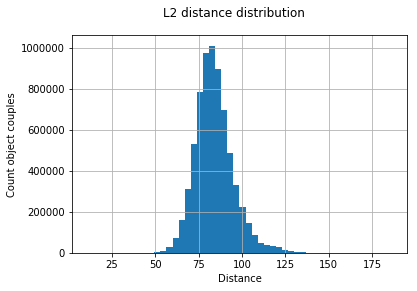

In [15]:
hist_array(distances_l2, bins=50, title='L2 distance distribution', xlabel='Distance', ylabel='Count object couples')